# Decision Tree

## Import libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.text import Annotation

print("Libraries imported!")

Libraries imported!


## Model Architecture

In [10]:
import numpy as np

class DecisionTree():
    """
    Decision Tree Classifier

    Parameters:
    - criterion (str): The impurity measure used for splitting ('gini', 'entropy', 'classification_error').
    - max_depth (int): Maximum depth of the tree.

    Methods:
    - fit(X, y): Fit the decision tree to the training data.
    - predict(X): Predict the labels for new data using the fitted tree.
    - traverse_tree(node, depth): Traverse the decision tree and print its structure.
    """

    def __init__(self, criterion='gini', max_depth=None):
        """
        Initialize the DecisionTree.

        Parameters:
        - criterion (str): The impurity measure used for splitting ('gini', 'entropy', 'classification_error').
        - max_depth (int): Maximum depth of the tree.
        """
        self.criterion = criterion
        self.max_depth = max_depth

    def fit(self, X, y):
        """
        Fit the decision tree to the training data.

        Parameters:
        - X (array-like): Training feature matrix.
        - y (array-like): Target labels.
        """
        self.n_classes_ = len(np.unique(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        """
        Predict the labels for new data using the fitted tree.

        Parameters:
        - X (array-like): New data feature matrix.

        Returns:
        - y_pred (array-like): Predicted labels.
        """
        y_pred = []
        for x in X:
            node = self.tree_
            while node.left:
                if x[node.feature_idx] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            y_pred.append(node.majority_class)
        return y_pred

    def _grow_tree(self, X, y, depth=0):
        """
        Recursively grow the decision tree.

        Parameters:
        - X (array-like): Feature matrix.
        - y (array-like): Target labels.
        - depth (int): Current depth of the tree.

        Returns:
        - node (Node): Root node of the subtree.
        """
        samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        majority_class = np.argmax(samples_per_class)
        node = Node(majority_class=majority_class)
        
        if depth < self.max_depth:
            feature_idx, threshold = self._best_split(X, y)
            if feature_idx is not None:
                node.num_samples = len(y)
                left_indices = X[:, feature_idx] < threshold
                X_left, y_left = X[left_indices], y[left_indices]
                X_right, y_right = X[~left_indices], y[~left_indices]
                node.feature_idx = feature_idx
                node.threshold = threshold
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node
    
    def _best_split(self, X, y):
        """
        Find the best feature and threshold for splitting.

        Parameters:
        - X (array-like): Feature matrix.
        - y (array-like): Target labels.

        Returns:
        - best_feature_idx (int): Index of the best feature.
        - best_threshold (float): Best split threshold.
        """
        m = y.size
        if m <= 1:
            return None, None
        
        best_impurity = self._impurity(y)
        best_feature_idx, best_threshold = None, None

        for feature_idx in range(self.n_features_):
            thresholds = sorted(X[:, feature_idx])
            for i in range(1, m):
                left_indices = X[:, feature_idx] < thresholds[i]
                y_left = y[left_indices]
                y_right = y[~left_indices]
                left_impurity = self._impurity(y_left)
                right_impurity = self._impurity(y_right)
                weighted_impurity = (len(y_left) / len(y)) * left_impurity + (len(y_right) / len(y)) * right_impurity
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if weighted_impurity < best_impurity:
                    best_impurity = weighted_impurity
                    best_feature_idx = feature_idx
                    best_threshold = (thresholds[i] + thresholds[i - 1]) / 2
        return best_feature_idx, best_threshold

    def _impurity(self, y):
        """
        Calculate impurity measure (Gini, Entropy, Classification Error).

        Parameters:
        - y (array-like): Target labels.

        Returns:
        - impurity (float): Impurity value.
        """
        _, counts = np.unique(y, return_counts=True)
        if self.criterion == 'gini':
            return 1 - np.sum(np.square(counts / len(y)))
        elif self.criterion == 'entropy':
            return -np.sum(counts / len(y) * np.log2(counts / len(y)))
        elif self.criterion == 'classification_error':
            return 1 - np.max(counts / len(y))

    def traverse_tree(self, node=None, depth=0):
        """
        Traverse the decision tree and print its structure.

        Parameters:
        - node (Node): Starting node for traversal.
        - depth (int): Current depth of the tree.
        """
        if node is None:
            node = self.tree_
        if node.is_leaf_node():
            print("  " * depth + f"Leaf Node: Majority class = {node.majority_class}")
        else:
            print("  " * depth + f"Node: Majority class = {node.majority_class}")
            if node.feature_idx is not None:
                print("  " * depth + f"  Split on feature {node.feature_idx} with threshold {node.threshold}")
                print("  " * depth + "  Left:")
                self.traverse_tree(node.left, depth + 1)
                print("  " * depth + "  Right:")
                self.traverse_tree(node.right, depth + 1)
        print("Number of samples in node: {}".format(node.num_samples))

class Node():
    """
    Node class representing a node in the decision tree.

    Attributes:
    - majority_class: Majority class in the node.
    - feature_idx: Index of the feature used for splitting.
    - threshold: Split threshold for the feature.
    - left: Left child node.
    - right: Right child node.
    - num_samples: Number of samples in the node.

    Methods:
    - is_leaf_node(): Check if the node is a leaf node.
    """

    def __init__(self, majority_class):
        """
        Initialize a Node in the decision tree.

        Parameters:
        - majority_class: Majority class in the node.
        """
        self.majority_class = majority_class  
        self.feature_idx = None
        self.threshold = None
        self.left = None
        self.right = None
        self.num_samples = None

    def is_leaf_node(self):
        """
        Check if the node is a leaf node.

        Returns:
        - is_leaf (bool): True if the node is a leaf node, False otherwise.
        """
        return self.left is None and self.right is None


## Dataset

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model

In [12]:
tree = DecisionTree(criterion='entropy', max_depth=3)
tree.fit(X_train, y_train)

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")
print(f"F1: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


## Tree traversal

In [14]:
tree.traverse_tree()

Node: Majority class = 1
  Split on feature 2 with threshold 2.45
  Left:
  Leaf Node: Majority class = 0
Number of samples in node: None
  Right:
  Node: Majority class = 1
    Split on feature 2 with threshold 4.75
    Left:
    Node: Majority class = 1
      Split on feature 3 with threshold 1.65
      Left:
      Leaf Node: Majority class = 1
Number of samples in node: None
      Right:
      Leaf Node: Majority class = 2
Number of samples in node: None
Number of samples in node: 37
    Right:
    Node: Majority class = 2
      Split on feature 3 with threshold 1.75
      Left:
      Leaf Node: Majority class = 1
Number of samples in node: None
      Right:
      Leaf Node: Majority class = 2
Number of samples in node: None
Number of samples in node: 43
Number of samples in node: 80
Number of samples in node: 120


## Visualization

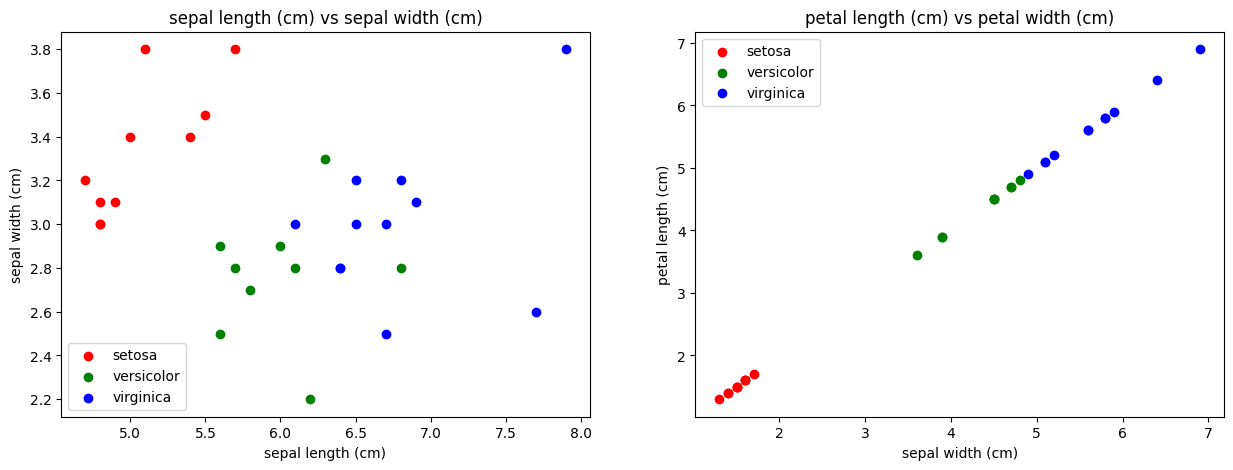

In [15]:
colors = ['r', 'g', 'b']

target_names = iris.target_names 
feature_names = iris.feature_names

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, target_name in enumerate(target_names):
    ax[0].scatter(X_test[y_test==i, 0], X_test[y_test==i, 1], c=colors[i], label=target_name)

ax[0].set_xlabel(feature_names[0])
ax[0].set_ylabel(feature_names[1])
ax[0].set_title(f"{feature_names[0]} vs {feature_names[1]}")
ax[0].legend()


for i, target_name in enumerate(target_names):
    ax[1].scatter(X_test[y_test==i, 2], X_test[y_test==i, 2], c=colors[i], label=target_name)

ax[1].set_xlabel(feature_names[1])
ax[1].set_ylabel(feature_names[2])
ax[1].set_title(f"{feature_names[2]} vs {feature_names[3]}")
ax[1].legend()



[Text(0.375, 0.875, 'node #0\npetal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.25, 0.625, 'node #1\ngini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'node #2\npetal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.25, 0.375, 'node #3\npetal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.125, 0.125, 'node #4\ngini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'node #5\ngini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.75, 0.375, 'node #6\npetal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.625, 0.125, 'node #7\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0.875, 0.125, 'node #8\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = virginica')]

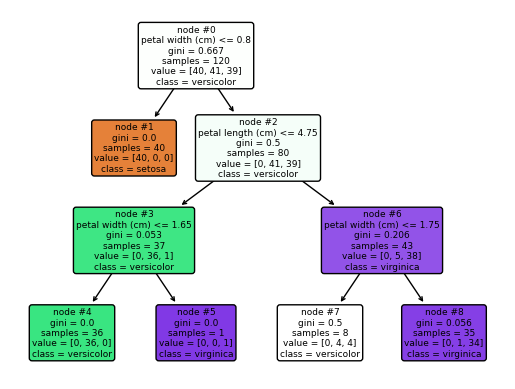

In [24]:
from sklearn.tree import plot_tree

plot_tree(tree, 
        filled=True, 
        feature_names=iris.feature_names, 
        class_names=list(iris.target_names), 
        node_ids=True, 
        rounded=True)